10.Cox Regression - LICA

Author: Alexperezm | Master's End of Degree Project - 2021-2022

Objective: Study and development of predictive models of survival based on several clinial variables (Gender, age, alcohol intake, Hepatitis C, Hepatitis B, Fibrosis stage and Edmonson Grade).

Loading the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install lifelines
#import lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 8.3 MB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=7ec7ed7b7db3dc904267d2519063f5d60b9913b400815b54aab4254d820b6cff
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.0 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 

In [3]:
from lifelines import KaplanMeierFitter

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel("/content/drive/MyDrive/TFM/Metadata_LICA.xlsx")
df.head()

,Sample,"alteration""","alteration type""",Gender,Age,Alcohol intake,Hepatitis B,Hepatitis C,Metabolic syndrome,Fibrosis stage,...,Last survival (days),Last survival delay (months),WES data EGA series,WES data sequencer,WES data capture kit,RNA-seq data EGA series,RNA-seq data library,RNA-seq read length,RNA-seq TopHat2 alignement options,WGS data EGA series
0,BCB307T,None,NaN,M,59.0,no,yes,no,no,F4,...,990.0,33.0,EGAS00001001002,HiSeq 2000,SureSelect Human All-Exon kit v4-70Mb,EGAS00001002879,Illumina TruSeq Stranded mRNA kit,2x75,-r 250 -g 2 --library-type fr-firststrand,NaN
1,BCM257T,CCNE1,AAV2,M,53.0,yes,no,no,no,F4,...,870.0,29.0,EGAS00001001002,HiSeq 2000,SureSelect Human All-Exon kit v4-70Mb,EGAS00001002879,Illumina TruSeq Stranded mRNA kit,2x75,-r 250 -g 2 --library-type fr-firststrand,NaN
2,BCM269T,None,NaN,M,67.0,no,yes,no,no,F4,...,690.0,23.0,EGAS00001001002,HiSeq 2000,SureSelect Human All-Exon kit v4-70Mb,EGAS00001002879,Illumina TruSeq Stranded mRNA kit,2x75,-r 250 -g 2 --library-type fr-firststrand,NaN
3,CHC018T,None,NaN,F,35.0,no,yes,no,no,F2-F3,...,1050.0,35.0,NaN,NaN,NaN,EGAS00001002879,Illumina TruSeq Stranded mRNA kit,2x75,-r 250 -g 2 --library-type fr-firststrand,EGAS00001000706
4,CHC051T,None,NaN,F,69.0,no,no,yes,no,F4,...,1620.0,54.0,EGAD00001000131,HiSeq 2000,SureSelect Human All-Exon kit v2-46Mb,EGAS00001002879,Illumina TruSeq mRNA kit,2x100,-R 200 -g 2 --library-type fr-unstranded,NaN


The dataset must be processed in order to adeccuate the variables for the modelling.

In [6]:
Fact_var = df[["Alcohol intake", "Hepatitis B","Hepatitis C", "Metabolic syndrome","Vascular invasion"]]

In [7]:
Fact_var

,Alcohol intake,Hepatitis B,Hepatitis C,Metabolic syndrome,Vascular invasion
0,no,yes,no,no,no
1,yes,no,no,no,no
2,no,yes,no,no,no
3,no,yes,no,no,yes
4,no,no,yes,no,no
...,...,...,...,...,...
155,yes,no,yes,no,no
156,no,no,no,no,yes
157,yes,no,yes,no,yes
158,yes,no,no,no,yes


In [8]:
cat = pd.Categorical(Fact_var["Alcohol intake"],categories=["no","yes"])
codes, uniques = pd.factorize(cat)
Fact_var["Alcohol intake"] = codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
cat = pd.Categorical(Fact_var["Hepatitis B"],categories=["no","yes"])
codes, uniques = pd.factorize(cat)
Fact_var["Hepatitis B"] = codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
cat = pd.Categorical(Fact_var["Hepatitis C"],categories=["no","yes"])
codes, uniques = pd.factorize(cat)
Fact_var["Hepatitis C"] = codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
cat = pd.Categorical(Fact_var["Metabolic syndrome"],categories=["no","yes"])
codes, uniques = pd.factorize(cat)
Fact_var["Metabolic syndrome"] = codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
cat = pd.Categorical(Fact_var["Vascular invasion"],categories=["no","yes"])
codes, uniques = pd.factorize(cat)
Fact_var["Vascular invasion"] = codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
Fact_var

,Alcohol intake,Hepatitis B,Hepatitis C,Metabolic syndrome,Vascular invasion
0,0,0,0,0,0
1,1,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,1,1,0,0
...,...,...,...,...,...
155,1,1,1,0,0
156,0,1,0,0,1
157,1,1,1,0,1
158,1,1,0,0,1


In [14]:
cat = pd.Categorical(df["Gender"], categories= ["M", "F"])
codes, uniques = pd.factorize(cat)
Fact_var["Gender"] = codes
print(uniques)
#Fact_var['Gender']= df["Gender"] == "M"
#Fact_var['Gender']= Fact_var['Gender']*1

['M', 'F']
Categories (2, object): ['M', 'F']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
cat = pd.Categorical(df["Fibrosis stage"], categories= ["F0-F1", "F2-F3","F4"])
codes, uniques = pd.factorize(cat)
Fact_var["Fibrosis stage"] = codes
print(uniques)

['F4', 'F2-F3', 'F0-F1']
Categories (3, object): ['F0-F1', 'F2-F3', 'F4']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
cat = pd.Categorical(df["Edmonson grade"], categories= ["I-II", "III-IV"])
codes, uniques = pd.factorize(cat)
Fact_var["Edmonson grade"] = codes
print(uniques)

#Fact_var['Edmonson grade']= df["Edmonson grade"] == "III-IV"
#Fact_var['Edmonson grade']= Fact_var['Edmonson grade']*1

['I-II', 'III-IV']
Categories (2, object): ['I-II', 'III-IV']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
Fact_var["Age"] = df["Age"]
Fact_var["Largest nodule diameter (mm)"] = df["Largest nodule diameter (mm)"]
Fact_var["Last survival (days)"] = df ["Last survival (days)"]
Fact_var["Vital status"] = df["Vital status"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [18]:
Fact_var

,Alcohol intake,Hepatitis B,Hepatitis C,Metabolic syndrome,Vascular invasion,Gender,Fibrosis stage,Edmonson grade,Age,Largest nodule diameter (mm),Last survival (days),Vital status
0,0,0,0,0,0,0,0,0,59.0,30.0,990.0,0.0
1,1,1,0,0,0,0,0,1,53.0,30.0,870.0,0.0
2,0,0,0,0,0,0,0,1,67.0,26.0,690.0,0.0
3,0,0,0,0,1,1,1,1,35.0,170.0,1050.0,0.0
4,0,1,1,0,0,1,0,1,69.0,60.0,1620.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,1,1,0,0,0,0,0,41.0,17.0,3300.0,1.0
156,0,1,0,0,1,0,2,1,70.0,210.0,1110.0,1.0
157,1,1,1,0,1,0,2,1,78.0,60.0,780.0,0.0
158,1,1,0,0,1,0,2,1,57.0,190.0,510.0,0.0


Review: all variables are codified correctly.

In [19]:
Fact_var.dtypes

Alcohol intake                    int64
Hepatitis B                       int64
Hepatitis C                       int64
Metabolic syndrome                int64
Vascular invasion                 int64
Gender                            int64
Fibrosis stage                    int64
Edmonson grade                    int64
Age                             float64
Largest nodule diameter (mm)    float64
Last survival (days)            float64
Vital status                    float64
dtype: object

In [20]:
Fact_var.isnull().sum()

Alcohol intake                  0
Hepatitis B                     0
Hepatitis C                     0
Metabolic syndrome              0
Vascular invasion               0
Gender                          0
Fibrosis stage                  0
Edmonson grade                  0
Age                             0
Largest nodule diameter (mm)    0
Last survival (days)            8
Vital status                    7
dtype: int64

In [21]:
Fact_var = Fact_var.dropna()

In [22]:
Fact_var.isnull().sum()

Alcohol intake                  0
Hepatitis B                     0
Hepatitis C                     0
Metabolic syndrome              0
Vascular invasion               0
Gender                          0
Fibrosis stage                  0
Edmonson grade                  0
Age                             0
Largest nodule diameter (mm)    0
Last survival (days)            0
Vital status                    0
dtype: int64

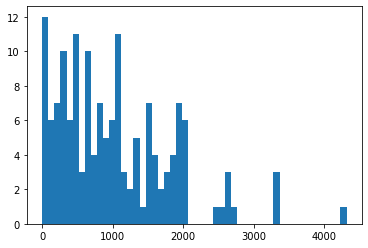

In [23]:
T = Fact_var["Last survival (days)"]
E = Fact_var["Vital status"]
plt.hist(T, bins = 50)
plt.show()

# Dummy Variables:


For those variables displaying several stages are made dummy variables, in order to simplify the modeling.

In [24]:
dummies_ecog = pd.get_dummies(Fact_var["Fibrosis stage"], prefix = 'Fibrosis stage')
dummies_ecog.head(4)

,Fibrosis stage_0,Fibrosis stage_1,Fibrosis stage_2
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0


In [25]:
dummies_ecog = dummies_ecog[["Fibrosis stage_0", "Fibrosis stage_1", "Fibrosis stage_2"]]
Fact_var = pd.concat([Fact_var, dummies_ecog], axis = 1)
Fact_var = Fact_var.drop("Fibrosis stage", axis = 1)
Fact_var.head()

,Alcohol intake,Hepatitis B,Hepatitis C,Metabolic syndrome,Vascular invasion,Gender,Edmonson grade,Age,Largest nodule diameter (mm),Last survival (days),Vital status,Fibrosis stage_0,Fibrosis stage_1,Fibrosis stage_2
0,0,0,0,0,0,0,0,59.0,30.0,990.0,0.0,1,0,0
1,1,1,0,0,0,0,1,53.0,30.0,870.0,0.0,1,0,0
2,0,0,0,0,0,0,1,67.0,26.0,690.0,0.0,1,0,0
3,0,0,0,0,1,1,1,35.0,170.0,1050.0,0.0,0,1,0
4,0,1,1,0,0,1,1,69.0,60.0,1620.0,0.0,1,0,0


In [26]:
dummies_ecog = pd.get_dummies(Fact_var["Edmonson grade"], prefix = 'Edmonson grade')
dummies_ecog.head(4)

,Edmonson grade_-1,Edmonson grade_0,Edmonson grade_1
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1


In [27]:
dummies_ecog = dummies_ecog[["Edmonson grade_-1", "Edmonson grade_0", "Edmonson grade_1"]]
Fact_var = pd.concat([Fact_var, dummies_ecog], axis = 1)
Fact_var = Fact_var.drop("Edmonson grade", axis = 1)
Fact_var.head()

,Alcohol intake,Hepatitis B,Hepatitis C,Metabolic syndrome,Vascular invasion,Gender,Age,Largest nodule diameter (mm),Last survival (days),Vital status,Fibrosis stage_0,Fibrosis stage_1,Fibrosis stage_2,Edmonson grade_-1,Edmonson grade_0,Edmonson grade_1
0,0,0,0,0,0,0,59.0,30.0,990.0,0.0,1,0,0,0,1,0
1,1,1,0,0,0,0,53.0,30.0,870.0,0.0,1,0,0,0,0,1
2,0,0,0,0,0,0,67.0,26.0,690.0,0.0,1,0,0,0,0,1
3,0,0,0,0,1,1,35.0,170.0,1050.0,0.0,0,1,0,0,0,1
4,0,1,1,0,0,1,69.0,60.0,1620.0,0.0,1,0,0,0,0,1


# Non parametric testing:

Development of the survival plots:

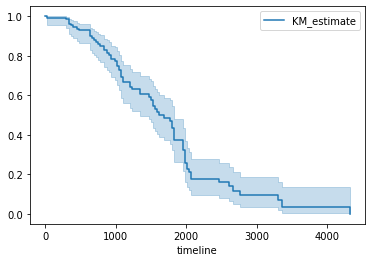

In [28]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

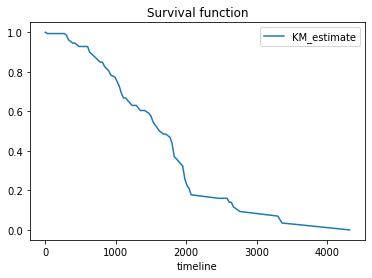

In [29]:
kmf.survival_function_.plot()
plt.title('Survival function')

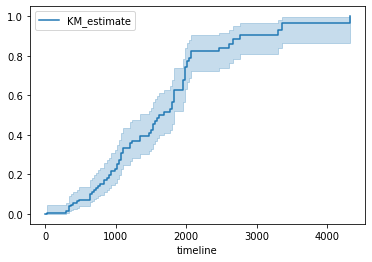

In [30]:
kmf.plot_cumulative_density()

In [31]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

1680.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                  1350.0                  1830.0


# Cox Proportional Hazard Model (Semi-Parametric)

Correlation matrix:

Based on Cox Proportional Hazard Model, is done the correlation matrix and afterwards the Kaplan Meier for each variable. The whole procedure is thoroughly explained in the memoir.

In [32]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
FIT=CoxPHFitter(penalizer=0.1).fit(Fact_var, duration_col = 'Last survival (days)', event_col = 'Vital status')
FIT.print_summary()

<lifelines.CoxPHFitter: fitted with 152 total observations, 80 right-censored observations>
             duration col = 'Last survival (days)'
                event col = 'Vital status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 152
number of events observed = 72
   partial log-likelihood = -254.75
         time fit was run = 2022-08-23 22:48:28 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
Alcohol intake                -0.78       0.46       0.25            -1.27            -0.28                 0.28                 0.75
Hepatitis B                    0.13       1.14       0.32            -0.49             0.75                 0.61                 2.12
Hepatitis C                   -0.52       0.59       0.34            -1.20             0.16                 0.30                 1.17
Metabolic syndrome             0.24       1.27       0.29            -0.33             0.80                 0.72                 2.22
Vascular invasion              0.03       1.03       0.25            -0.46             0.51                 0.63                 1.67
Gender                         0.08       1.08       0.30            -0.51             0.67                 0.60                 1.95
Age                            0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
Largest nodule diameter (mm)   0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
Fibrosis stage_0               0.20       1.22       0.38            -0.54             0.95                 0.58                 2.57
Fibrosis stage_1               0.05       1.05       0.38            -0.70             0.80                 0.50                 2.23
Fibrosis stage_2              -0.22       0.81       0.37            -0.93             0.50                 0.39                 1.65
Edmonson grade_-1              0.91       2.48       1.09            -1.22             3.04                 0.30                20.90
Edmonson grade_0               0.05       1.05       0.41            -0.74             0.84                 0.48                 2.32
Edmonson grade_1              -0.10       0.90       0.40            -0.89             0.69                 0.41                 1.99

                               cmp to     z      p   -log2(p)
covariate                                                    
Alcohol intake                   0.00 -3.08 <0.005       8.89
Hepatitis B                      0.00  0.42   0.68       0.57
Hepatitis C                      0.00 -1.51   0.13       2.93
Metabolic syndrome               0.00  0.82   0.41       1.28
Vascular invasion                0.00  0.11   0.91       0.13
Gender                           0.00  0.26   0.79       0.34
Age                              0.00  0.42   0.67       0.57
Largest nodule diameter (mm)     0.00  1.12   0.26       1.94
Fibrosis stage_0                 0.00  0.53   0.60       0.75
Fibrosis stage_1                 0.00  0.14   0.89       0.16
Fibrosis stage_2                 0.00 -0.59   0.56       0.85
Edmonson grade_-1                0.00  0.84   0.40       1.31
Edmonson grade_0                 0.00  0.12   0.90       0.15
Edmonson grade_1                 0.00 -0.25   0.80       0.32
---
Concordance = 0.65
Partial AIC = 537.50
log-likelihood ratio test = 14.77 on 14 df
-log2(p) of ll-ratio test = 1.34

Text(0, 0.5, 'edm')

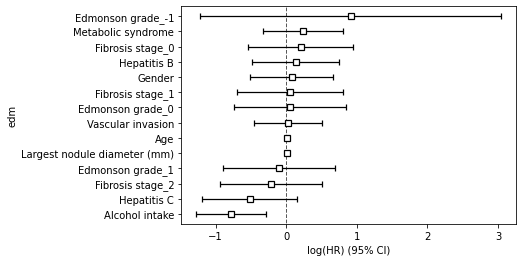

In [36]:
FIT.plot()

In [ ]:
matrix = Fact_var.corr()
print(matrix)

                              Alcohol intake  Hepatitis B  Hepatitis C  \
Alcohol intake                      1.000000     0.210150    -0.129928   
Hepatitis B                         0.210150     1.000000     0.193000   
Hepatitis C                        -0.129928     0.193000     1.000000   
Metabolic syndrome                 -0.026081     0.179279    -0.231958   
Vascular invasion                  -0.036513    -0.067704    -0.005715   
Gender                             -0.317984     0.037246     0.149376   
Age                                 0.200228     0.324736    -0.063286   
Largest nodule diameter (mm)       -0.021970     0.004773    -0.271135   
Last survival (days)                0.115287    -0.045742    -0.050180   
Vital status                       -0.146132    -0.093023    -0.172494   
Fibrosis stage_0                    0.013439    -0.158153     0.374092   
Fibrosis stage_1                    0.072973    -0.020198     0.003279   
Fibrosis stage_2                   -0.

Text(0.5, 1.0, 'Supervivencia según género')

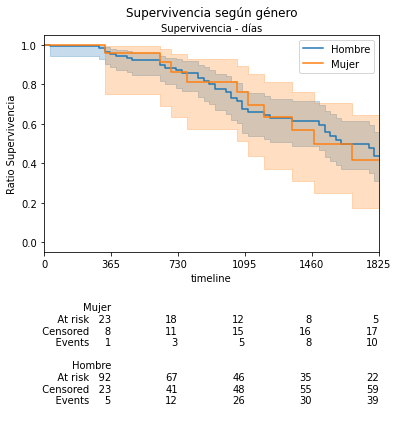

In [ ]:
ax = plt.subplot(111)
m = (Fact_var["Gender"] == 0)

kmf_male = KaplanMeierFitter()
ax = kmf_male.fit(durations = T[m], event_observed = E[m], label = "Hombre").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)
ax.set_xlabel('Días', size = 10)
ax.set_ylabel('Ratio Supervivencia', size = 10)
np.arange(0, 1, step=0.2)
ax.set_xticks([0,365,730,1095,1460,1825]) #np.arange(0, 1825, step=365)

kmf_female = KaplanMeierFitter()
ax = kmf_female.fit(durations = T[~m], event_observed = E[~m], label = "Mujer").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)
#time_limit = 1825

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_female, kmf_male, ax=ax,xticks=[365,730,1095,1460,1825])


#plt.
#plt.tight_layout()
plt.xlabel("Supervivencia - días")
plt.title("Supervivencia según género")
#plt.text(6, 9.5, 'Here we go')

In [ ]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
point_in_time = 1825
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_female, kmf_male)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 1825
           fitterA = <lifelines.KaplanMeierFitter:"Mujer", fitted with 32 total observations, 17 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"Hombre", fitted with 120 total observations, 63 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.01 0.91      0.14

Text(0.5, 1.0, 'Supervivencia según consumo de alcohol')

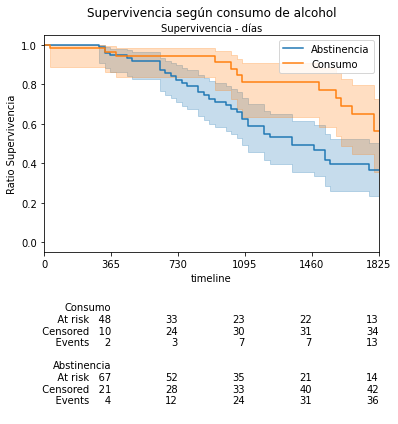

In [ ]:
ax = plt.subplot(111)
m = (Fact_var["Alcohol intake"] == 0)

kmf_abst = KaplanMeierFitter()
ax = kmf_abst.fit(durations = T[m], event_observed = E[m], label = "Abstinencia").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)
ax.set_xlabel('Días', size = 10)
ax.set_ylabel('Ratio Supervivencia', size = 10)
np.arange(0, 1, step=0.2)
ax.set_xticks([0,365,730,1095,1460,1825])

kmf_cons = KaplanMeierFitter()
ax = kmf_cons.fit(T[~m], event_observed = E[~m], label = "Consumo").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_cons, kmf_abst, ax=ax,xticks=[365,730,1095,1460,1825])

#plt.tight_layout()
plt.xlabel("Supervivencia - días")
plt.title("Supervivencia según consumo de alcohol")

In [ ]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
point_in_time = 1825
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_abst, kmf_cons)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 1825
           fitterA = <lifelines.KaplanMeierFitter:"Abstinencia", fitted with 92 total observations, 43 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"Consumo", fitted with 60 total observations, 37 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           1.93 0.16      2.60

In [ ]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
point_in_time = 1460
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_abst, kmf_cons)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 1460
           fitterA = <lifelines.KaplanMeierFitter:"Abstinencia", fitted with 92 total observations, 43 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"Consumo", fitted with 60 total observations, 37 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           7.59 0.01      7.41

Text(0.5, 1.0, 'Supervivencia según Hepatitis C')

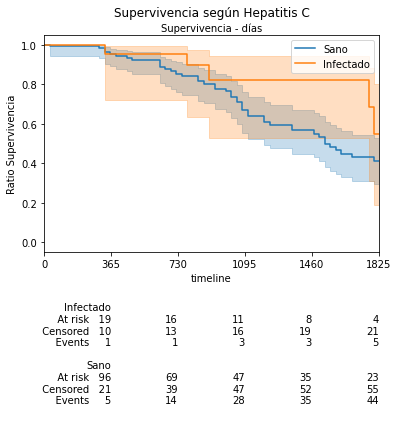

In [ ]:
ax = plt.subplot(111)
m = (Fact_var["Hepatitis C"] == 0)

kmf_healthy = KaplanMeierFitter()
ax = kmf_healthy.fit(durations = T[m], event_observed = E[m], label = "Sano").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)
ax.set_xlabel('Días', size = 10)
ax.set_ylabel('Ratio Supervivencia', size = 10)
np.arange(0, 1, step=0.2)
ax.set_xticks([0,365,730,1095,1460,1825]) 

kmf_hepC = KaplanMeierFitter()
ax = kmf_hepC.fit(T[~m], event_observed = E[~m], label = "Infectado").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_hepC, kmf_healthy, ax=ax, xticks=[365,730,1095,1460,1825])

#plt.tight_layout()
plt.xlabel("Supervivencia - días")
plt.title("Supervivencia según Hepatitis C")

In [ ]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
point_in_time = 1825
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_healthy, kmf_hepC)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 1825
           fitterA = <lifelines.KaplanMeierFitter:"Sano", fitted with 122 total observations, 59 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"Infectado", fitted with 30 total observations, 21 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.96

Text(0.5, 1.0, 'Supervivencia según grado de fibrosis')

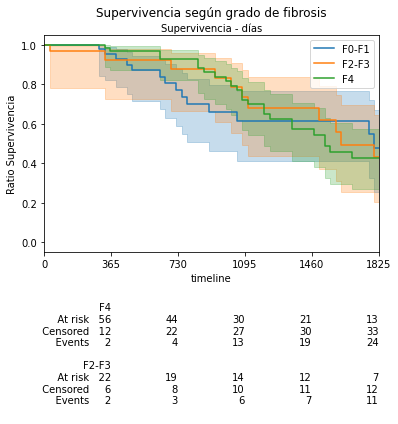

In [ ]:
ax = plt.subplot(111)
m = (Fact_var["Fibrosis stage_0"] == 1)
kmf_F0_F1 = KaplanMeierFitter()
ax = kmf_F0_F1.fit(durations = T[m], event_observed = E[m], label = "F0-F1").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)
ax.set_xlabel('Días', size = 10)
ax.set_ylabel('Ratio Supervivencia', size = 10)
np.arange(0, 1, step=0.2)
ax.set_xticks([0,365,730,1095,1460,1825]) 

n = (Fact_var["Fibrosis stage_1"] == 1)
kmf_F2_F3 = KaplanMeierFitter()
ax = kmf_F2_F3.fit(T[n], event_observed = E[n], label = "F2-F3").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)

o = (Fact_var["Fibrosis stage_2"] == 1)
kmf_F4 = KaplanMeierFitter()
ax = kmf_F4.fit(T[o], event_observed = E[o], label = "F4").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_F4, kmf_F2_F3, ax=ax, xticks=[365,730,1095,1460,1825]) #,kmf_F0_F1

#plt.tight_layout()
plt.xlabel("Supervivencia - días")
plt.title("Supervivencia según grado de fibrosis")

In [ ]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
point_in_time = 1825
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_F0_F1, kmf_F2_F3)
results.print_summary()
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_F0_F1, kmf_F4)
results.print_summary()
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_F2_F3,kmf_F4)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 1825
           fitterA = <lifelines.KaplanMeierFitter:"F0-F1", fitted with 52 total observations, 32 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"F2-F3", fitted with 30 total observations, 12 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.07 0.80      0.33

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 1825
           fitterA = <lifelines.KaplanMeierFitter:"F0-F1", fitted with 52 total observations, 32 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"F4", fitted with 70 total observations, 36 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.11 0.74      0.44

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 1825
           fitterA = <lifelines.KaplanMeierFitter:"F2-F3", fitted with 30 total observations, 12 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"F4", fitted with 70 total observations, 36 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.00 0.97      0.05

Text(0.5, 1.0, 'Supervivencia según Grado de Edmonson')

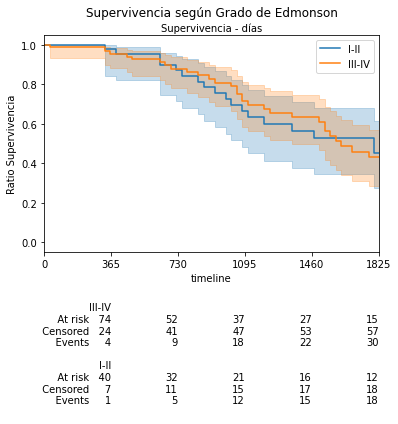

In [ ]:
ax = plt.subplot(111)
m = (Fact_var["Edmonson grade_0"] == 1)
edm_I_II = KaplanMeierFitter()
ax = edm_I_II.fit(durations = T[m], event_observed = E[m], label = "I-II").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)
ax.set_xlabel('Días', size = 10)
ax.set_ylabel('Ratio Supervivencia', size = 10)
np.arange(0, 1, step=0.2)
ax.set_xticks([0,365,730,1095,1460,1825]) 

n = (Fact_var["Edmonson grade_1"] == 1)
edm_III_IV = KaplanMeierFitter()
ax = edm_III_IV.fit(T[n], event_observed = E[n], label = "III-IV").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(edm_III_IV, edm_I_II, ax=ax, xticks=[365,730,1095,1460,1825])

#plt.tight_layout()
plt.xlabel("Supervivencia - días")
plt.title("Supervivencia según Grado de Edmonson")

In [ ]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
point_in_time = 1825
results = survival_difference_at_fixed_point_in_time_test(point_in_time, edm_I_II, edm_III_IV)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 1825
           fitterA = <lifelines.KaplanMeierFitter:"I-II", fitted with 48 total observations, 21 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"III-IV", fitted with 102 total observations, 58 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.03 0.87      0.20

Text(0.5, 1.0, 'Supervivencia según Hepatitis B')

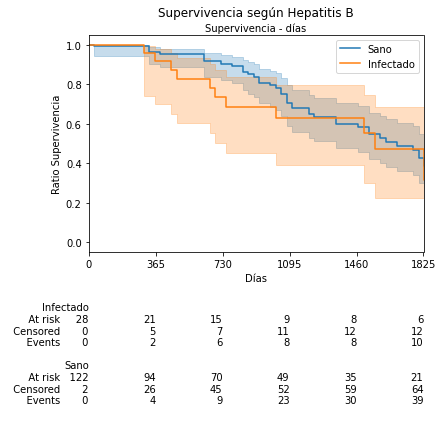

In [ ]:
ax = plt.subplot(111)
m = (Fact_var["Hepatitis B"] == 1)
kmf_healthy = KaplanMeierFitter()
ax = kmf_healthy.fit(durations = T[m], event_observed = E[m], label = "Sano").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)
ax.set_xlabel('Días', size = 10)
ax.set_ylabel('Ratio Supervivencia', size = 10)
np.arange(0, 1, step=0.2)
ax.set_xticks([0,365,730,1095,1460,1825]) 

kmf_hepC = KaplanMeierFitter()
ax = kmf_hepC.fit(T[~m], event_observed = E[~m], label = "Infectado").plot_survival_function(ax=ax)
ax.set_xlim(0,1825)
ax.set_xlabel('Días', size = 10)
ax.set_ylabel('Ratio Supervivencia', size = 10)
np.arange(0, 1, step=0.2)
ax.set_xticks([0,365,730,1095,1460,1825]) 

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_hepC, kmf_healthy, ax=ax)

#plt.tight_layout()
plt.xlabel("Supervivencia - días")
plt.title("Supervivencia según Hepatitis B")

In [ ]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
point_in_time = 1825
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_healthy, kmf_hepC)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 1825
           fitterA = <lifelines.KaplanMeierFitter:"Sano", fitted with 122 total observations, 59 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"Infectado", fitted with 30 total observations, 21 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.96